In [1]:
# import libraries
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

2023-04-04 12:05:48.462795: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-04 12:05:48.624894: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-04 12:05:48.628646: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-04 12:05:48.628663: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [2]:
# Load the dataset
(trainX, ytrain), (testX, ytest) = mnist.load_data()

In [3]:
#reshaping data 
xtrain=np.reshape(trainX,(-1,28,28,1))
xtest=np.reshape(testX,(-1,28,28,1))
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

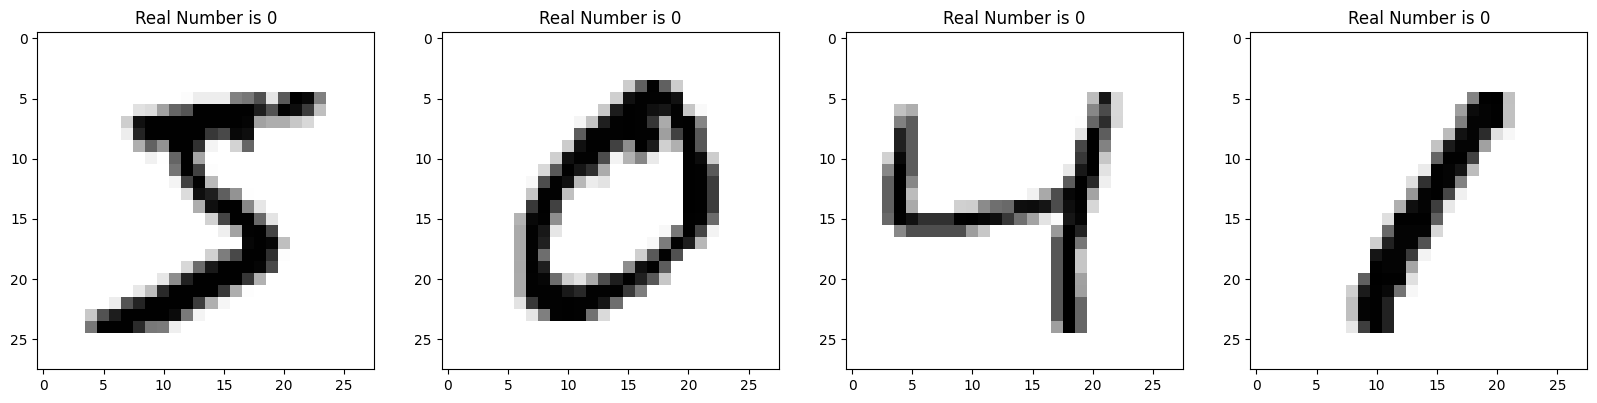

In [4]:
# Visulize the dataset
X_train__ = xtrain.reshape(xtrain.shape[0], 28, 28)

fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train__[i], cmap='binary')
    digit = ytrain[i].argmax()
    ax.set(title = f"Real Number is {digit}");

In [5]:
#normalize the data
xtrain=xtrain/255
xtest=xtest/255

In [6]:
# Define the model
model=Sequential()
#adding layers and forming the model
model.add(Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(64,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))

model.add(Flatten())

model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="sigmoid"))
#compiling
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])


2023-04-04 12:06:00.228050: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-04 12:06:00.228135: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-04 12:06:00.228160: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Hafsa-Laptop): /proc/driver/nvidia/version does not exist
2023-04-04 12:06:00.228695: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 1024)              3

In [9]:
#training the model
model.fit(xtrain,ytrain,batch_size=64,epochs=2,validation_data=(xtest,ytest))

Epoch 1/2
938/938 [==============================] - 52s 56ms/step - loss: 0.0635 - accuracy: 0.9807 - val_loss: 0.0431 - val_accuracy: 0.9859
Epoch 2/2
938/938 [==============================] - 52s 55ms/step - loss: 0.0338 - accuracy: 0.9894 - val_loss: 0.0248 - val_accuracy: 0.9921


In [10]:
#model train and test scores
model.evaluate(xtrain,ytrain),model.evaluate(xtest,ytest)

313/313 [==============================] - 5s 15ms/step - loss: 0.0248 - accuracy: 0.9921


([0.01565835066139698, 0.9948999881744385],
 [0.024798836559057236, 0.9921000003814697])